In [3]:
%pip install fredapi > /dev/null
%pip install plotly

Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 5.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 100)

from fredapi import Fred

FRED API KEY: 2e1205270938c06be90d3aa38de50da2

account (cryp******3@gmail.com)


In [11]:
fred_key = '2e1205270938c06be90d3aa38de50da2'


## 1. Create The Fred Object

In [12]:
fred = Fred(api_key=fred_key)

## 2. Search for economic data!

In [16]:
sp_search = fred.search('S&P', order_by='popularity', sort_order='desc', limit=10)

In [17]:
sp_search.shape

(10, 15)

In [18]:
sp_search

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2022-11-01,2022-11-01,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2022-10-31,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2022-11-01 09:30:09-05:00,96,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2022-11-01,2022-11-01,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-08-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2022-10-25 08:02:01-05:00,91,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2022-11-01,2022-11-01,ICE BofA US High Yield Index Effective Yield,1996-12-31,2022-10-31,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2022-11-01 09:30:14-05:00,86,This data represents the effective yield of th...
SP500,SP500,2022-11-01,2022-11-01,S&P 500,2012-11-01,2022-10-31,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2022-10-31 19:10:58-05:00,84,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2022-11-01,2022-11-01,Real Median Household Income in the United States,1984-01-01,2021-01-01,Annual,A,2021 CPI-U-RS Adjusted Dollars,2021 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2022-09-13 13:48:01-05:00,82,Household data are collected as of March. As ...
CSUSHPISA,CSUSHPISA,2022-11-01,2022-11-01,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-08-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2022-10-25 08:02:03-05:00,81,"For more information regarding the index, plea..."
BAMLC0A0CM,BAMLC0A0CM,2022-11-01,2022-11-01,ICE BofA US Corporate Index Option-Adjusted Sp...,1996-12-31,2022-10-31,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2022-11-01 09:37:02-05:00,80,The ICE BofA Option-Adjusted Spreads (OASs) ar...
DJIA,DJIA,2022-11-01,2022-11-01,Dow Jones Industrial Average,2012-11-01,2022-10-31,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2022-10-31 19:13:03-05:00,74,The observations for the Dow Jones Industrial ...
SPCS20RSA,SPCS20RSA,2022-11-01,2022-11-01,S&P/Case-Shiller 20-City Composite Home Price ...,2000-01-01,2022-08-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2022-10-25 08:02:04-05:00,72,"For more information regarding the index, plea..."


## 3. Pull raw data

In [20]:
sp500 = fred.get_series('SP500')

<AxesSubplot:title={'center':'S&P 500'}>

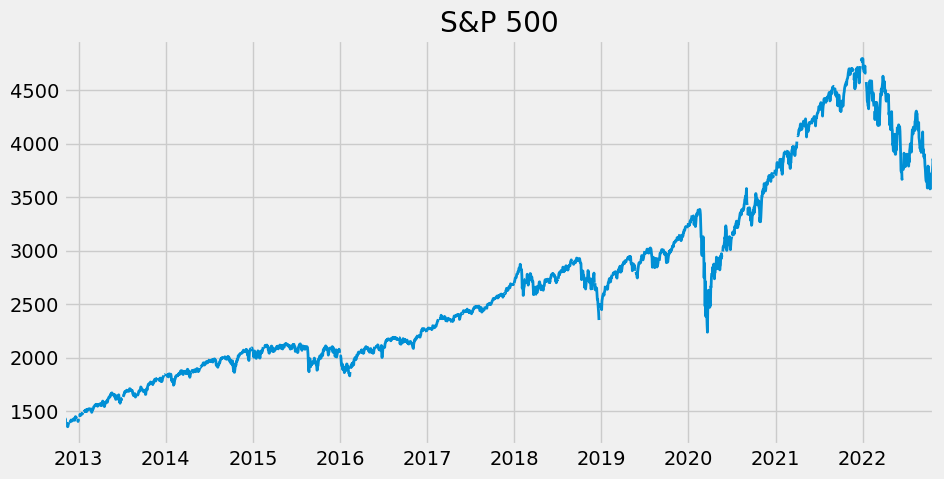

In [25]:
# do a quick visualisation of the S&P 500
# plot the sp500 series
sp500.plot(figsize=(10, 5), title='S&P 500', lw=2)


## 4. Pull and join multiple data series

lets get unemployment rates
Use fred search to do that

In [42]:
unemployment_results = fred.search('unemployment', limit=10)

In [43]:
unemployment_results

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2022-11-03,2022-11-03,Unemployment Rate,1948-01-01,2022-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-10-07 07:44:01-05:00,94,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2022-11-03,2022-11-03,Unemployment Rate,1948-01-01,2022-09-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-10-07 07:43:02-05:00,59,The unemployment rate represents the number of...
NROU,NROU,2022-11-03,2022-11-03,Noncyclical Rate of Unemployment,1949-01-01,2032-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2022-05-26 13:45:04-05:00,71,"Starting with the July, 2021 report: An Update..."
UNEMPLOY,UNEMPLOY,2022-11-03,2022-11-03,Unemployment Level,1948-01-01,2022-09-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2022-10-07 07:44:02-05:00,70,The series comes from the 'Current Population ...
CCSA,CCSA,2022-11-03,2022-11-03,Continued Claims (Insured Unemployment),1967-01-07,2022-10-22,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2022-11-03 07:33:03-05:00,70,"Continued claims, also referred to as insured ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LRUN64TTCAM156S,LRUN64TTCAM156S,2022-11-03,2022-11-03,Unemployment Rate: Aged 15-64: All Persons for...,1976-01-01,2022-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-08-11 15:02:10-05:00,6,OECD descriptor ID: LRUN64TT OECD unit ID: STS...
ASHE737URN,ASHE737URN,2022-11-03,2022-11-03,"Unemployment Rate in Asheville, NC (MSA)",1990-01-01,2022-09-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-11-02 10:08:26-05:00,4,None
LRUN74TTEUA156N,LRUN74TTEUA156N,2022-11-03,2022-11-03,Unemployment Rate: Aged 15-74: All Persons for...,1998-01-01,2019-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2020-04-17 11:56:18-05:00,4,OECD descriptor ID: LRUN74TT OECD unit ID: ST ...


In [44]:
# get seasonally adjusted monthly unrate series
unrate = fred.get_series('UNRATE')

<AxesSubplot:>

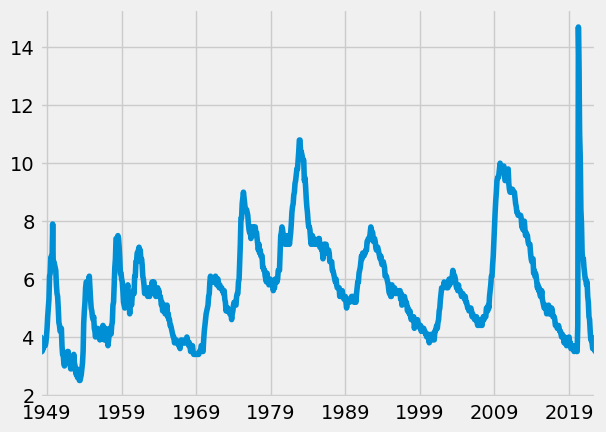

In [45]:
unrate.plot()

In [64]:
unemp_df = fred.search('unemployment rate state', filter=('frequency', 'Monthly'))

In [65]:
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [66]:
unemp_df['title']


series id
UNRATE                                              Unemployment Rate
U6RATE              Total Unemployed, Plus All Persons Marginally ...
LNS14000006             Unemployment Rate - Black or African American
CAUR                                  Unemployment Rate in California
M0892AUSM156SNBR                  Unemployment Rate for United States
                                          ...                        
LRUN25TTUSM156S     Unemployment Rate: Aged 25-54: All Persons for...
LBSSA11             Labor Force Participation Rate for District Of...
LBSSA10                   Labor Force Participation Rate for Delaware
LNS14000062                     Unemployment Rate - 25-54 Yrs., Women
M08320USM156SNBR    Unemployment Rate, Per Cent of Persons Unemplo...
Name: title, Length: 161, dtype: object

In [72]:
# lets filter by titles that contain the phrase 'Unemployment Rate'
unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')].shape

unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]


In [77]:
# Now we are going to get the data for each of the series in the unemp_df dataframe. 
# loop through each and run get_series on the id
# store the results in a dictionary
all_results = {}

for id in unemp_df.index:
    result = fred.get_series(id)
    all_results[id] = result.to_frame(name=id)
    # we want to join up eventually so lets make it a dataframe


In [78]:
all_results.keys()

dict_keys(['UNRATE', 'LNS14000006', 'CAUR', 'M0892AUSM156SNBR', 'LNS14000031', 'M0892BUSM156SNBR', 'LNS14000024', 'TXUR', 'LNS14000002', 'NYUR', 'FLUR', 'U2RATE', 'LNS14000009', 'LNS14000001', 'LNS14027662', 'LNS14000003', 'LNS14027660', 'OHUR', 'ALUR', 'PAUR', 'MIUR', 'KYUR', 'ILUR', 'LRUN64TTUSM156S', 'NJUR', 'MAUR', 'AKUR', 'WIUR', 'COUR', 'INUR', 'MOUR', 'NCUR', 'LNS14032183', 'MNUR', 'LNS14000012', 'VAUR', 'NDUR', 'LASMT261982000000003', 'TNUR', 'WAUR', 'AZUR', 'IAUR', 'GAUR', 'UTUR', 'LNS14027659', 'LAUR', 'ORUR', 'ARUR', 'SCUR', 'OKUR', 'WVUR', 'NMUR', 'LNS14000018', 'HIUR', 'KSUR', 'MDUR', 'LASMT391746000000003', 'MSUR', 'LNS14024887', 'MTUR', 'NVUR', 'WYUR', 'DCUR', 'CTUR', 'NEUR', 'SDUR', 'IDUR', 'RIUR', 'LNS14000060', 'MEUR', 'PRUR', 'NHUR', 'LNS14000036', 'VTUR', 'CMWRUR', 'LNS14000032', 'LNS14000028', 'DEUR', 'LRHUTTTTUSM156S', 'CNERUR', 'LNS14000026', 'LNS14000029', 'LNS14027689', 'LRUNTTTTUSM156S', 'LNS14000315', 'LRUN24TTUSM156S', 'CSOUUR', 'CWSTUR', 'LNS14000025', 'LNS

In [31]:
# function to combine the two series by date
def combine_series(first_series, second_series):
    combined = pd.concat([first_series, second_series], axis=1)
    combined.columns = ['sp500', 'unemployment']
    return combined

combined = combine_series(sp500, unrate)

In [36]:
# combined = combined.dropna()

In [37]:
combined.head()

,sp500,unemployment
2012-11-01,1427.59,7.7
2013-02-01,1513.17,7.7
2013-03-01,1518.20,7.5
2013-04-01,1562.17,7.6
2013-05-01,1582.70,7.5


array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

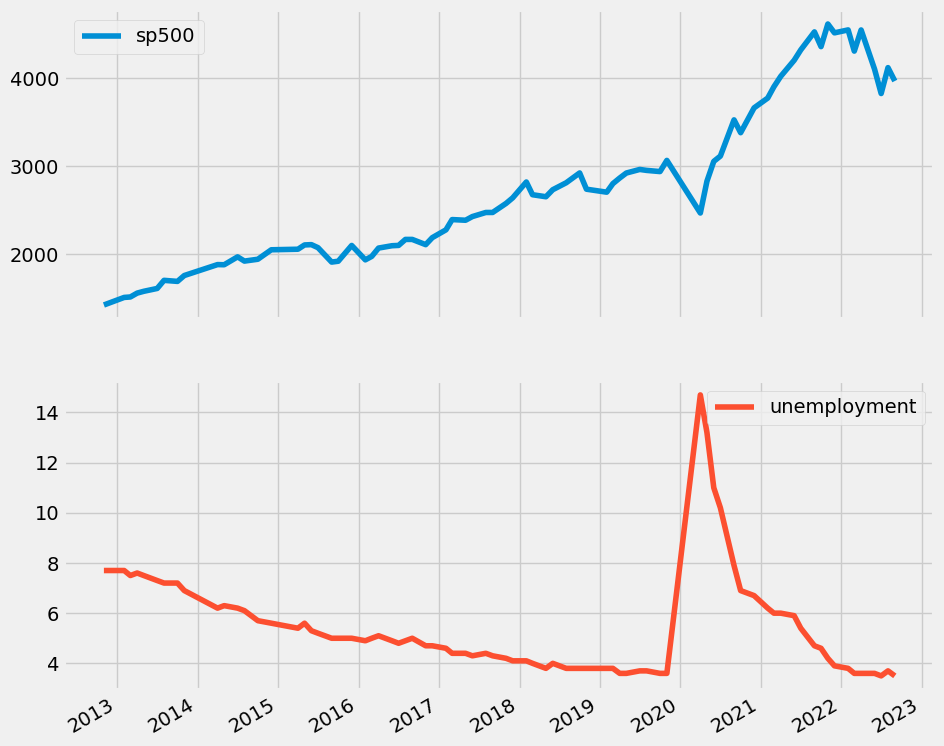

In [39]:
# plot the combination
combined.plot(subplots=True, figsize=(10, 10))


<AxesSubplot:title={'center':'Unemployment Rate'}>

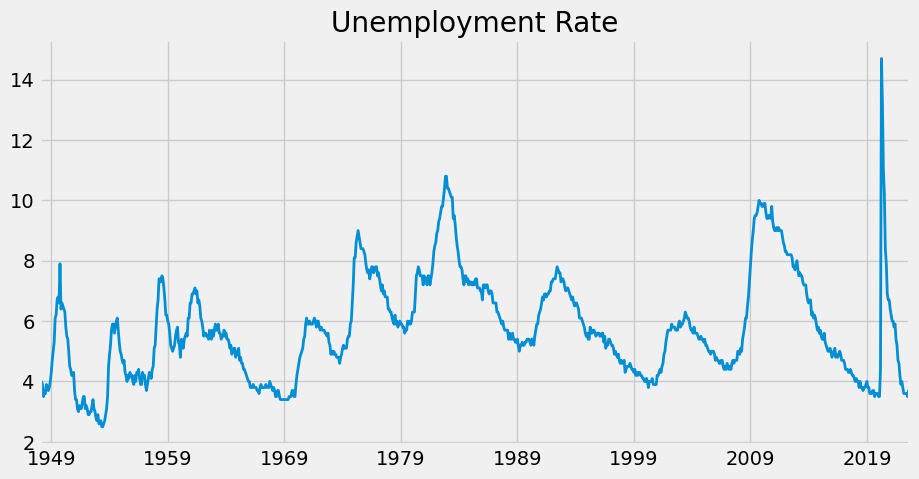

In [41]:
unrate.plot(figsize=(10, 5), title='Unemployment Rate', lw=2)